In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

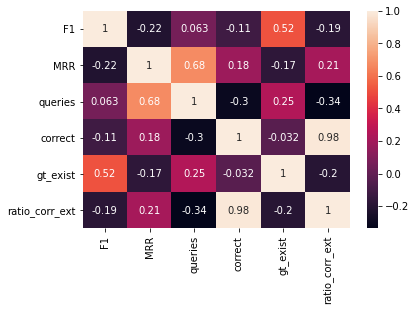

In [12]:
df = pd.read_csv('metric_for_mig_log.csv')
atm = df[['atm_off','MRR','queries_atm','correct_atm','gt_exist_atm','ratio_corr_ext_atm']].copy()
atm = atm.rename(columns={'atm_off':'F1','queries_atm':'queries','correct_atm':'correct','gt_exist_atm':'gt_exist','ratio_corr_ext_atm':'ratio_corr_ext'})
corrMatrix = atm.corr()
# corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('plots/atm_corr.pdf', bbox_inches= 'tight')
plt.close()

craft = df[['craft_off','MRR','queries_craft','correct_craft','gt_exist_craft','ratio_corr_ext_craft']].copy()
craft = craft.rename(columns={'craft_off':'F1','queries_craft':'queries','correct_craft':'correct','gt_exist_craft':'gt_exist','ratio_corr_ext_craft':'ratio_corr_ext'})
corrMatrix = craft.corr()
# corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('plots/craft_corr.pdf', bbox_inches= 'tight')

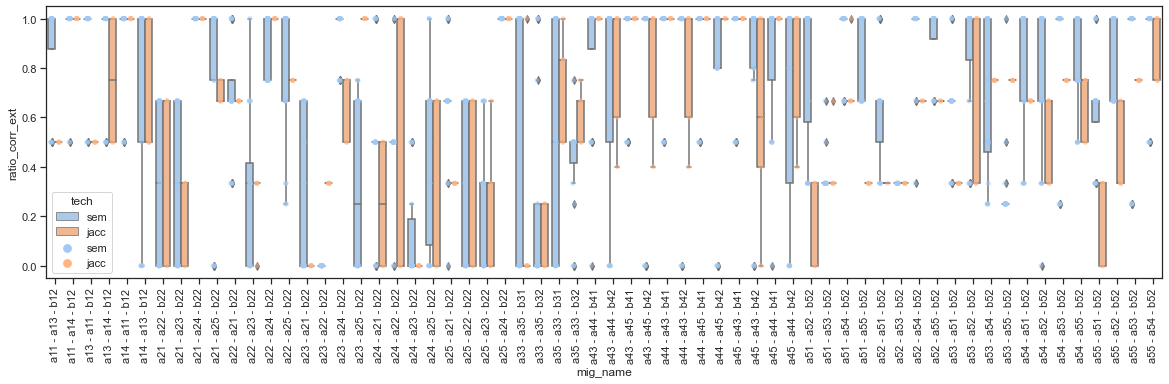

In [37]:
def creat_box_plots(path, column, save_path, gt_path=None):
    plt.clf()
    plt.close()
    plt.figure(figsize=(20, 5))
    df = pd.read_csv(path).sort_values(by=['src','target'])
    df['mig_name'] = df['src']+ ' - ' + df['target']+ ' - ' + df['task']
    df['tech'] = ''
    df['tech'] = df.apply(lambda x: 'jacc' if 'jacc' in x['word_embedding']else 'sem', axis=1)
    ax = sn.boxplot(data = df, y = column , x = 'mig_name', hue='tech')

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    sn.stripplot(data = df, y = column , x = 'mig_name', hue='tech', jitter=True,
                 dodge=True,
                 marker='o',
                 alpha=0.5)
    if gt_path:
        gt_df = pd.read_csv(gt_path).sort_values(by=['mig_name'])
        gt_df.rename(columns= {'correct_q': column}, inplace=True)
        sn.stripplot(data = gt_df, y = column , x = 'mig_name', color='red')
    plt.savefig(save_path, bbox_inches= 'tight')

creat_box_plots('mig_lvl_results_atm.csv', 'unique_q', 'plots/atm_unique_q.pdf')
creat_box_plots('mig_lvl_results_atm.csv', 'correct_q', 'plots/atm_correct_q.pdf', 'gt_lvl_results_atm.csv')
creat_box_plots('mig_lvl_results_atm.csv', 'gt_exist', 'plots/atm_gt_exist.pdf', 'gt_lvl_results_atm.csv')
creat_box_plots('mig_lvl_results_atm.csv', 'ratio_corr_ext', 'plots/atm_ratio_corr_ext.pdf')

creat_box_plots('mig_lvl_results_craft.csv', 'unique_q', 'plots/craft_unique_q.pdf')
creat_box_plots('mig_lvl_results_craft.csv', 'correct_q', 'plots/craft_correct_q.pdf', 'gt_lvl_results_craft.csv')
creat_box_plots('mig_lvl_results_craft.csv', 'gt_exist', 'plots/craft_gt_exist.pdf', 'gt_lvl_results_craft.csv')
creat_box_plots('mig_lvl_results_craft.csv', 'ratio_corr_ext', 'plots/craft_ratio_corr_ext.pdf')


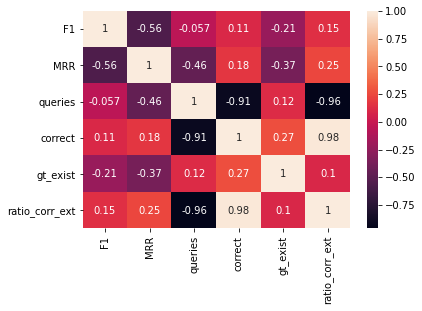

In [11]:
df = pd.read_csv('metric_for_mig_log.csv')
sm = df[df['config'].str.contains('jacc')]
atm = sm[['atm_off','MRR','queries_atm','correct_atm','gt_exist_atm','ratio_corr_ext_atm']].copy()
atm = atm.rename(columns={'atm_off':'F1','queries_atm':'queries','correct_atm':'correct','gt_exist_atm':'gt_exist','ratio_corr_ext_atm':'ratio_corr_ext'})
corrMatrix = atm.corr()
# corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('plots/atm_corr.pdf', bbox_inches= 'tight')
plt.close()


craft = sm[['craft_off','MRR','queries_craft','correct_craft','gt_exist_craft','ratio_corr_ext_craft']].copy()
craft = craft.rename(columns={'craft_off':'F1','queries_craft':'queries','correct_craft':'correct','gt_exist_craft':'gt_exist','ratio_corr_ext_craft':'ratio_corr_ext'})
corrMatrix = craft.corr()
# corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('plots/craft_corr.pdf', bbox_inches= 'tight')